# Table of Contents
 <p><div class="lev1"><a href="#Init"><span class="toc-item-num">1 - </span>Init</a></div><div class="lev1"><a href="#Formulas"><span class="toc-item-num">2 - </span>Formulas</a></div>

# Init

In [5]:
import numpy as np
from numpy import pi,sqrt,sin,cos,tan,arcsin,arccos,arctan
from numpy import real as re
from numpy import imag as im
from numpy import conj as conj
from numpy import exp  as exp

import sympy as sp
from sympy import limit, Symbol, oo

import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import display,Math,HTML,Latex # Used to display widgets in the notebook
sp.init_printing(use_unicode=True,use_latex=True,euler=True)
import ipywidgets as widgets #If not install run <pip install ipywidgets> in DOS command prompt (Anaconda distribution)
import time
print('Init done:', time.ctime() )
%matplotlib inline 
%connect_info
#sympy.__version__


Init done: Mon Mar  7 16:41:42 2016
{
  "transport": "tcp",
  "key": "975cbc5d-f675-4c46-b6fb-96eb5e14425e",
  "shell_port": 55406,
  "iopub_port": 55407,
  "control_port": 55409,
  "stdin_port": 55408,
  "hb_port": 55410,
  "signature_scheme": "hmac-sha256",
  "ip": "127.0.0.1"
}

Paste the above JSON into a file, and connect with:
    $> ipython <app> --existing <file>
or, if you are local, you can connect with just:
    $> ipython <app> --existing C:\Users\mhof\AppData\Roaming\jupyter\runtime\kernel-85cdbe6a-36e8-43ba-ae18-4a83d8e10353.json 
or even just:
    $> ipython <app> --existing 
if this is the most recent IPython session you have started.


# Formulas

In [6]:
#Symbolic variablde definitions http://docs.sympy.org/dev/modules/core.html
VmSym,ImSym,I1sym,I2sym,I3sym,I4sym,I5sym =sp.symbols( r"V_m,I_m,I_1,I_2,I_3,I_4,I_5",positive=True)

ZAIsym,ZAIBIsym,ZAICIsym,ZAIAIIsym,ZAIBIIsym =sp.symbols(
    r"Z_{AI},Z_{AIBI},Z_{AICI},Z_{AIAII},Z_{AIBII}",positive=True)

ZBIsym,ZBICIsym,ZBIAIIsym,ZBIBIIsym =sp.symbols(
    r"Z_{BI},Z_{BICI},Z_{BIAII},Z_{BIBII}",positive=True)

ZCIsym,ZCIAIIsym,ZCIBIIsym  =sp.symbols(r"Z_{CI},Z_{CIAII},Z_{CIBII}",positive=True)
ZAIIsym,ZAIIBIIsym          =sp.symbols(r"Z_{AII},Z_{AIIBII}",positive=True)
ZBIIsym                    =sp.symbols(r"Z_{BII}",positive=True)




In [7]:
Zmat=sp.Matrix([
            [ZAIsym    ,ZAIBIsym  ,ZAICIsym  ,ZAIAIIsym  ,ZAIBIIsym],
            [ZAIBIsym  ,ZBIsym    ,ZBICIsym  ,ZBIAIIsym  ,ZBIBIIsym],
            [ZAICIsym  ,ZBICIsym  ,ZCIsym    ,ZCIAIIsym  ,ZCIBIIsym],
            [ZBICIsym  ,ZBICIsym  ,ZCIAIIsym ,ZAIIsym    ,ZAIIBIIsym],
            [ZAIBIIsym ,ZAIAIIsym ,ZCIBIIsym ,ZAIIBIIsym ,ZBIIsym]   
               ])

Vmat= sp.Matrix([VmSym,VmSym,VmSym,0,0])

Imat= sp.Matrix([ImSym-I2sym-I3sym,ImSym-I1sym-I3sym,ImSym-I1sym-I2sym,I4sym,I5sym])

Ich bräuchte folgendes Gleichungssystem gelöst: (Bitte mal checken ob die Z Matrix korrekt ist)

In [8]:
display(Math(r"{0:s}={1:s}\cdot {2:s} ".format(sp.latex(Vmat),sp.latex(Zmat),sp.latex(Imat))))

<IPython.core.display.Math object>


Zunächst soll nach $I_1$ bis $I_5$ aufgelöst werden:

In [9]:
Mmat=Zmat*Imat-Vmat
exp1= Mmat.row(0)[0]
exp2= Mmat.row(1)[0]
exp3= Mmat.row(2)[0]
exp4= Mmat.row(3)[0]
exp5= Mmat.row(4)[0]
display(Math(r"{0:s}=0  ".format(sp.latex(exp1))))
display(Math(r"{0:s}=0  ".format(sp.latex(exp2))))
display(Math(r"{0:s}=0  ".format(sp.latex(exp3))))
display(Math(r"{0:s}=0  ".format(sp.latex(exp4))))
display(Math(r"{0:s}=0  ".format(sp.latex(exp5))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Das sind die 5 Gleichungen die im nun nach ach $I_1$ bis $I_5$ aufgelöst werden können. Allerdings ist die Ausgangsmatrixgleichung nicht der Form Ax=B (mit A,B Matrizen und x als Vektor) wodurch die Lösung derbe kompliziert wird (meine Annahme). Unten die Lösung, ich habe erstmal nicht weiter gemacht.  

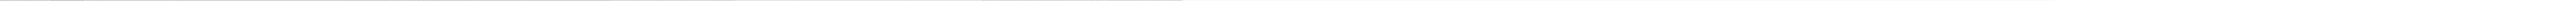

In [10]:
sp.solve([exp1,exp2,exp3,exp4,exp5], [I1sym,I2sym,I3sym,I4sym,I5sym])


Dann nimmst die erste Gleichung aus dem System und löst sie nach $V_m$ auf, muss ja eigentlich nur ausmultipliziert werden. Dann teilst die Gleichung durch $I_m$ wodurch dann links $V_m$/$I_m$ steht, also $Z_m$.

